In [145]:
from sklearn import cross_validation, grid_search, linear_model,svm, metrics,preprocessing,pipeline

import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [3]:
raw_data = pd.read_csv('train.csv', header = 0, sep = ',')

## Признаки
№ | Код | Название | Примечание
  ------------- | ------------- | -------------
1 | survival | выжил   | 0 = Нет, 1 = Да
2 | pclass  | Класс билета| 1,2,3
3 | sex	| Пол |	male, female
4|Age| Возраст в годах |
5|sibsp	| Количество братьев, сестер, супруг на борту Титаника |
6|parch | Количество родилетей/детей на борту Титаника |
7|ticket | # билета |
8|fare | Стоимость билета |
9|cabin | № каюты |
10|embarked	| Порт посадки | C = Cherbourg, Q = Queenstown, S = Southampton

In [407]:
raw_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Каюта

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


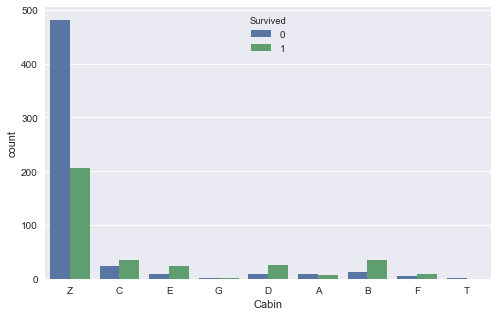

In [344]:
df_cab=raw_data[['Cabin']].fillna('Z')
df_cab['Cabin']=df_cab['Cabin'].apply(lambda x:x[0])
sns.countplot(x='Cabin', hue='Survived', data=df_cab.join(raw_data['Survived']));
# Делаем массив бинарных признаков
df_cab=pd.get_dummies(df_cab)
df_cab.head()

## Класс

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Pclass_Class1,Pclass_Class2,Pclass_Class3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


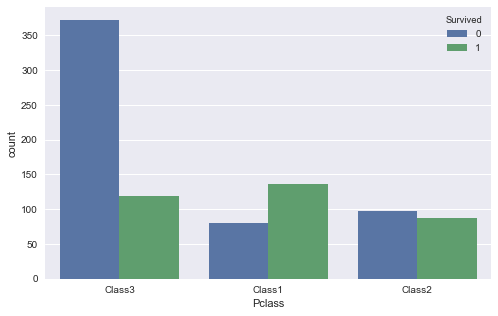

In [361]:
df_class=raw_data[['Pclass']]
df_class['Pclass']=df_class['Pclass'].apply(lambda x:'Class'+str(x))
sns.countplot(x='Pclass', hue='Survived', data=df_class.join(raw_data['Survived']));
# Делаем массив бинарных признаков
df_class=pd.get_dummies(df_class)
df_class.head()

### Возраст

#### Пробуем добораться возраст по полу
df_age=raw_data[['Sex','Age']]
male_age_mean=df_age[df_age['Sex']=='male']['Age'].mean()
female_age_mean=df_age[df_age['Sex']=='female']['Age'].mean()
df_age_male=df_age[df_age['Sex']=='male'][['Age']].fillna(male_age_mean)
df_age_female=df_age[df_age['Sex']=='female'][['Age']].fillna(female_age_mean)
df_age=df_age_male.append(df_age_female)
df_age=df_age.sort_index()


,Age0,Age1,Age2,Age3,Age4,Age5,Age6,Age7
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


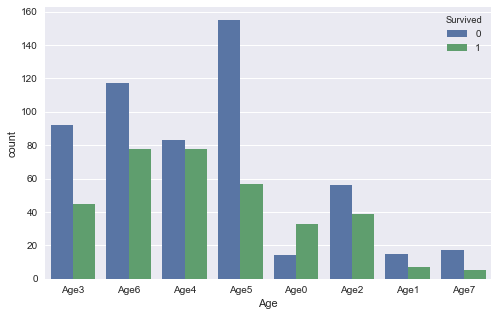

In [453]:
def age_convert(age):
    if age<=6:
        return 0
    elif age<=12:
        return 1
    elif age<=19:
        return 2
    elif age<=25:
        return 3
    elif age<=30:
        return 4
    elif age<=35:
        return 5
    elif age<=60:
        return 6
    else: 
        return 7

df_age=df_age.fillna(df_age.mean())
df_age['Age']=df_age['Age'].apply(age_convert)
df_age['Age']=df_age['Age'].apply(lambda x:'Age'+str(x))
sns.countplot(x='Age', hue='Survived', data=df_age.join(raw_data['Survived']));
# Делаем массив бинарных признаков
df_age=pd.get_dummies(df_age,prefix='',prefix_sep='')
df_age.head()

In [402]:
target=raw_data[['Survived']]
target=target.values.ravel()
data=raw_data[['SibSp','Parch','Fare']]
data['Sex']=raw_data.Sex.apply( lambda x:0 if x == 'male' else 1 )
data['Fare']=data['Fare'].apply(lambda x:int(x/20))
data=data.join(df_age)
data=data.join(df_class)
data=data.join(df_cab)
data.head(10)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SibSp,Parch,Fare,Sex,Age_Age0,Age_Age1,Age_Age2,Age_Age3,Age_Age4,Age_Age5,...,Pclass_Class3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,3,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,2,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
6,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,3,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,0,2,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
9,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Изучение данных

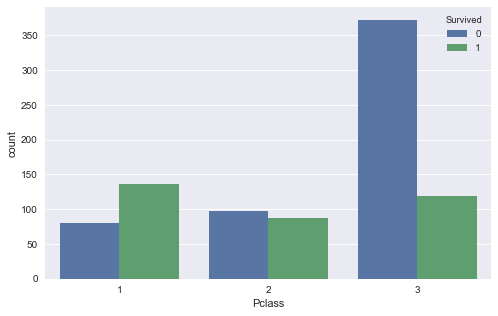

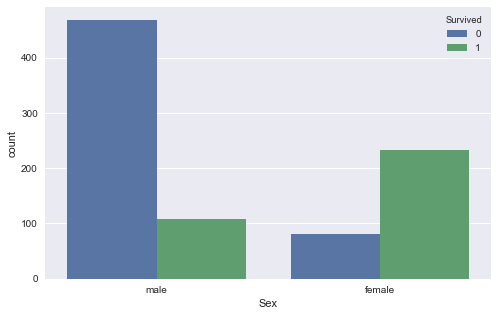

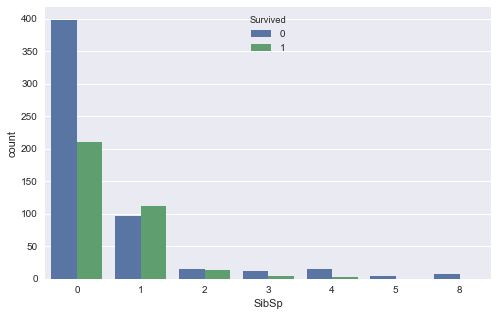

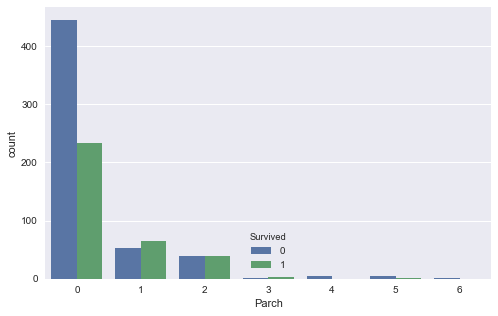

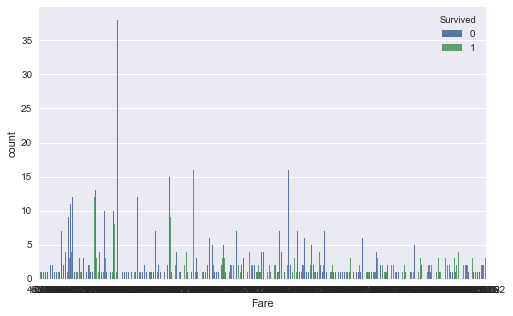

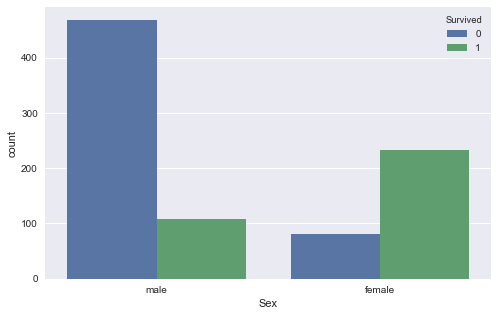

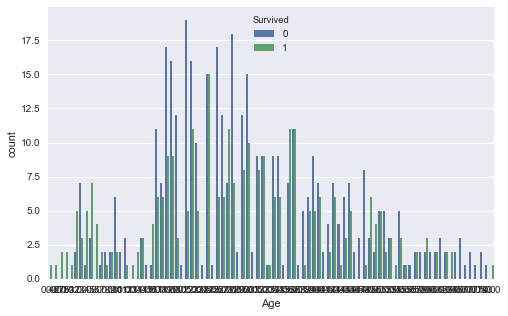

In [163]:
for x in ['Pclass','Sex','SibSp','Parch','Fare','Sex','Age']:
    sns.countplot(x=x, hue='Survived', data=raw_data);
    plt.show()

(array([ 769.,   69.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
         22.5,  25. ]),
 <a list of 10 Patch objects>)

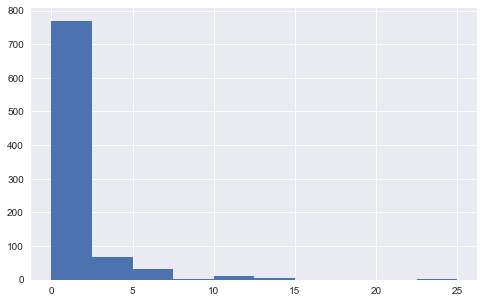

In [179]:
plt.hist(raw_data.Fare.apply(lambda x:int(x/20)))

### Модели

In [454]:
def fit(name,regressor,cv_strategy):
    #создаем pipeline из двух шагов: scaling и классификация
    pipeline = Pipeline(steps = [('scaling', preprocessing.StandardScaler(with_mean = 0)), ('regression', regressor)])
     # Выводим точность классификатора на отложенном тесте
    pipeline.fit(train_data, train_labels)
    split_acc=metrics.accuracy_score(test_labels, pipeline.predict(test_data))
    # Точность на кросс валидации
    sv_scoring = cross_validation.cross_val_score(pipeline, data, target, scoring = 'accuracy', cv = cv_strategy)
    return name,round(split_acc,3),round(sv_scoring.mean(),3), round(sv_scoring.max(),2), round(sv_scoring.min(),2), round(sv_scoring.std(),2)

train_data,test_data,train_labels,test_labels=cross_validation.train_test_split(data, target, test_size=0.33, random_state=1)

cv_strategy = cross_validation.StratifiedShuffleSplit(target, n_iter = 20 , test_size = 0.3, random_state = 2)
models=(
        ("LinearLogisticRegression",linear_model.LogisticRegression(random_state = 1)),
        ("LinearRidgeClassifier",linear_model.RidgeClassifier(random_state = 1)),
        ("LinearSVC",svm.LinearSVC(random_state=1)),
        ("NuSVC",svm.NuSVC(random_state=1)),
        ("SVC-rbf",svm.SVC(kernel='rbf',random_state=1)),
        ("SVC-sigmoid",svm.SVC(kernel='sigmoid',random_state=1)),
        ("SVC-poly",svm.SVC(kernel='poly',random_state=1))   
)

result=pd.DataFrame(columns=['Name','ACC',"CV_mean","CV_max", "CV_min","SV_std"])

for model in models:
    score=fit (model[0],model[1],cv_strategy)
    result.loc[len(result)]=score
print(result['CV_mean'].mean())
result.sort_values(by='CV_mean',  ascending=False)

0.8011428571428573


,Name,ACC,CV_mean,CV_max,CV_min,SV_std
0,LinearLogisticRegression,0.769,0.817,0.85,0.76,0.02
2,LinearSVC,0.780,0.814,0.85,0.76,0.02
3,NuSVC,0.773,0.814,0.86,0.78,0.02
4,SVC-rbf,0.766,0.814,0.86,0.78,0.02
1,LinearRidgeClassifier,0.776,0.812,0.85,0.76,0.02
6,SVC-poly,0.780,0.810,0.84,0.77,0.02
5,SVC-sigmoid,0.695,0.727,0.76,0.68,0.02
